# Real Estate Project

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_name = 'Bengaluru_House_Data.csv'

In [3]:
df = pd.read_csv(file_name)

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
# Inspecting the first dataframe
print('Shape:', df.shape)
print ("----------------------------------")
print('Columns:', df.columns)
print ("----------------------------------")
print ("area_type: ",df['area_type'].unique())
print ("----------------------------------")
print ("availability: ",df['availability'].unique())
print ("----------------------------------")
print ("location: ",df['location'].unique())
print ("----------------------------------")
print ("size: ",df['size'].unique())
print ("----------------------------------")
print ("society: ",df['society'].unique())
print ("----------------------------------")
print ("bath: ",df['bath'].unique())
print ("----------------------------------")
print ("balcony: ",df['balcony'].unique())
print ("----------------------------------")
print (df.info())

Shape: (13320, 9)
----------------------------------
Columns: Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')
----------------------------------
area_type:  ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
----------------------------------
availability:  ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun'

- variable types are NOT correct
- 6 columns/variables contain Nan, what to do with them ?
- balcony and bath are count thus they should be int
- Further invetigation into the catogrical variables are required.

In [7]:
round(df['area_type'].value_counts(normalize=True, dropna=False ),2)

Super built-up  Area    0.66
Built-up  Area          0.18
Plot  Area              0.15
Carpet  Area            0.01
Name: area_type, dtype: float64

- No NaNs values (very good)
- Data Not Balanced, 66% are of type super built-up area
- Ordinal Categorical Variable?
- **What are the difference between them ?**

In [8]:
round(df['availability'].value_counts(normalize=True, dropna=False ),2)

Ready To Move    0.79
18-Dec           0.02
18-May           0.02
18-Apr           0.02
18-Aug           0.02
                 ... 
15-Dec           0.00
16-Jan           0.00
15-Aug           0.00
14-Nov           0.00
17-Jan           0.00
Name: availability, Length: 81, dtype: float64

- No NaNs values (very good)
- Data extremely Not Balanced, 80% are of type ready to move
- **maybe consider packing them by season (fall, summer, spring, winter)**

In [9]:
print(round(df['location'].value_counts(normalize=True, dropna=False ),4))
print("There are {} Nan value in this column.".format(df['location'].isna().sum()))

Whitefield            0.0405
Sarjapur  Road        0.0300
Electronic City       0.0227
Kanakpura Road        0.0205
Thanisandra           0.0176
                       ...  
Chickpet              0.0001
Javarandoddi          0.0001
Kanakadasa Layout     0.0001
West of Chord Road    0.0001
NaN                   0.0001
Name: location, Length: 1306, dtype: float64
There are 1 Nan value in this column.


- 1% of of the observation in location column is missing , maybe it should be droped off ?
- Data is somewhat balanced

In [10]:
print(round(df['size'].value_counts(normalize=True, dropna=False ),4))
print("There are {} Nan value in this column.".format(df['size'].isna().sum()))

2 BHK         0.3903
3 BHK         0.3236
4 Bedroom     0.0620
4 BHK         0.0444
3 Bedroom     0.0411
1 BHK         0.0404
2 Bedroom     0.0247
5 Bedroom     0.0223
6 Bedroom     0.0143
1 Bedroom     0.0079
8 Bedroom     0.0063
7 Bedroom     0.0062
5 BHK         0.0044
9 Bedroom     0.0035
6 BHK         0.0023
7 BHK         0.0013
NaN           0.0012
1 RK          0.0010
10 Bedroom    0.0009
9 BHK         0.0006
8 BHK         0.0004
11 Bedroom    0.0002
10 BHK        0.0002
11 BHK        0.0002
13 BHK        0.0001
14 BHK        0.0001
19 BHK        0.0001
12 Bedroom    0.0001
43 Bedroom    0.0001
16 BHK        0.0001
27 BHK        0.0001
18 Bedroom    0.0001
Name: size, dtype: float64
There are 16 Nan value in this column.


- 0.1% of of the observation in size column is missing , What should be done with it.
- Data seems to be balanced.
- **is 2 bedrom = 2BHK ?**

In [11]:
print(round(df['society'].value_counts(normalize=True, dropna=False ),2))
print("There are {} Nan value in this column.".format(df['society'].isna().sum()))

NaN        0.41
GrrvaGr    0.01
PrarePa    0.01
Sryalan    0.00
Prtates    0.00
           ... 
LuncyRe    0.00
Satanan    0.00
Cedusy     0.00
NCenega    0.00
Bebalrk    0.00
Name: society, Length: 2689, dtype: float64
There are 5502 Nan value in this column.


- **40% of of the observation in society column is missing which is really big**

In [12]:
print(round(df['bath'].value_counts(normalize=True, dropna=False ),2))
print("There are {} Nan value in this column.".format(df['bath'].isna().sum()))

2.0     0.52
3.0     0.25
4.0     0.09
1.0     0.06
5.0     0.04
6.0     0.02
7.0     0.01
NaN     0.01
8.0     0.00
9.0     0.00
10.0    0.00
12.0    0.00
11.0    0.00
13.0    0.00
16.0    0.00
18.0    0.00
14.0    0.00
40.0    0.00
15.0    0.00
27.0    0.00
Name: bath, dtype: float64
There are 73 Nan value in this column.


- 0.1% of of the observation in size column is missing , What should be done with it.
    - **replace with values of median of the same group**

In [13]:
print(round(df['balcony'].value_counts(normalize=True, dropna=False ),2))
print("There are {} Nan value in this column.".format(df['balcony'].isna().sum()))

2.0    0.38
1.0    0.37
3.0    0.13
0.0    0.08
NaN    0.05
Name: balcony, dtype: float64
There are 609 Nan value in this column.


- 0.1% of of the observation in size column is missing , What should be done with it.
    - **replace with values of median of the same group**

In [14]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


Based on the **uncleaned and explored data**:
- bath seems to be skewed to the right
- balcony seems to be skewed to the left
- pirce seems to be heavily skewed to the right

## Dealing with NaNs

### Location

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [16]:
df[df['location'].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [17]:
df[df['society']=="Grare S"]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0
12238,Carpet Area,Ready To Move,Anantapura,3 BHK,Grare S,1600,3.0,2.0,77.0


In [18]:
# is society and location are releated ? it seems like they both means the same thing! collinearity?
df[df['society']=="Mahla T"].head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
3956,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1023,2.0,2.0,42.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0


In [19]:
#lets investigate more, seems not, a location could have multipal different societies!
df[df['location']=="Raja Rajeshwari Nagar"].society.value_counts()

GrrvaGr    80
Prllsan     9
NaonySy     5
GRvanun     3
Lancyey     3
Neess P     2
Vaw 1il     2
i1rtsCo     2
Mahla T     2
DwntsAp     2
Dehts H     2
Deade A     1
Nencei      1
7 ise P     1
Vaderla     1
Cee 2du     1
SGandea     1
Lancy R     1
Avlya A     1
Spensas     1
AcisePa     1
ChionCo     1
Avlls H     1
Elleyt      1
Sithand     1
Shmai D     1
DScon S     1
Cedusy      1
PrrvaPl     1
Tentsw      1
MaaveDu     1
Keave E     1
Ely 3Em     1
Arnis A     1
Name: society, dtype: int64

In [20]:
df.loc[:,"location"][568] = df.loc[:,"location"][12238]

C:\Users\ajoor\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df[df['society']=="Grare S"] # it is no longer an Nan value

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,Anantapura,3 BHK,Grare S,1600,3.0,2.0,86.0
12238,Carpet Area,Ready To Move,Anantapura,3 BHK,Grare S,1600,3.0,2.0,77.0


### Size

In [22]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13320 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [24]:
df[df['size'].isna()] 

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


- Does this mean an empty land ? The meaning of area_type **must be explored** to answer this questions

- **Carpet Area:** Carpet area is the actual area you get for use in a housing unit
- **Built-Up Area:** Carpet Area + Wall area
- **Super Built-Up Area*:** Built-Up Area + common area
- **Plot Area:** The area which is surrounded by a boundary line (fencing)

- My question is still unanswered, lets explore the rest of data of the type **Plot Area**

In [25]:
df[df['area_type']=='Plot  Area']
# it seems it, it is only refering to the area (how it is calculated)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.0
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.0
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.0
14,Plot Area,Ready To Move,Sarjapur,3 Bedroom,Skityer,2250,3.0,2.0,148.0
22,Plot Area,Ready To Move,Thanisandra,4 Bedroom,Soitya,2800,5.0,2.0,380.0
...,...,...,...,...,...,...,...,...,...
13291,Plot Area,18-Jan,Weavers Colony,1 Bedroom,NaN,812,1.0,0.0,26.0
13300,Plot Area,Ready To Move,Hosakerehalli,5 Bedroom,NaN,1500,6.0,2.0,145.0
13303,Plot Area,Ready To Move,Vidyaranyapura,5 Bedroom,NaN,774,5.0,3.0,70.0
13306,Plot Area,Ready To Move,Rajarajeshwari Nagara,4 Bedroom,NaN,1200,5.0,NaN,325.0


In [26]:
df[df['availability']=="Immediate Possession"]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


- it would be appropriate to replace bath and balcony with **zero**, and size with new type called **empty**
- We will guess the value of bath and balcony based on size

In [27]:
df[['size']] = df[['size']].fillna(value="empty")

In [28]:
df[df['size'].isna()] # Nans has been filled

,area_type,availability,location,size,society,total_sqft,bath,balcony,price


### Bath and Balcony

In [29]:
print("Bath NaN shape: ", df[df['bath'].isna()].shape)
print("Balcony NaN shape: ", df[df['balcony'].isna()].shape)

Bath NaN shape:  (73, 9)
Balcony NaN shape:  (609, 9)


In [30]:
df[df['balcony'].isna()].head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.0
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.0


In [31]:
df[df['bath'].isna()].head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.0
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.5


In [32]:
new_bath_list = []
new_balocony_list = []

for index, row in df.iterrows():    
    
    # Dealing with Bath
    if math.isnan(row['bath']):
        if row['size']=="empty":
            new_bath_list.append(0)
        else: 
            new_bath_list.append(df[df['size']==row['size']].bath.median())
    else: 
        new_bath_list.append(row['bath'])
    
    # Dealing with Balcony
    if math.isnan(row['balcony']):
        if row['size']=="empty":
            new_balocony_list.append(0)
        else:
            if math.isnan(df[df['size']==row['size']].balcony.median()) == False:
                new_balocony_list.append(df[df['size']==row['size']].balcony.median())
            else:
                if math.isnan(df[df['bath']==row['bath']].balcony.median()) == False:
                    new_balocony_list.append(df[df['bath']==row['bath']].balcony.median())
                else:
                    if math.isnan(df[df['total_sqft']==row['total_sqft']].balcony.median()) == False:
                        new_balocony_list.append(df[df['total_sqft']==row['total_sqft']].balcony.median())
                    else:
                        new_balocony_list.append(row['balcony'])
    else: 
        new_balocony_list.append(row['balcony'])

In [33]:
print("Bath len = " ,len(new_bath_list))
print("Balocony len = " ,len(new_balocony_list))
print("Both should equal = " ,len(df))

Bath len =  13320
Balocony len =  13320
Both should equal =  13320


In [34]:
df['bath'] = new_bath_list
df['balcony'] = new_balocony_list

In [35]:
print("Bath NaN shape: ", df[df['bath'].isna()].shape)
print("Balcony NaN shape: ", df[df['balcony'].isna()].shape)

Bath NaN shape:  (0, 9)
Balcony NaN shape:  (0, 9)


### Society

In [36]:
df[df['society'].isna()].head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,2.0,370.00
10,Super built-up Area,18-Feb,Whitefield,3 BHK,NaN,1800,2.0,2.0,70.00


In [37]:
df[(df['size']=="3 BHK") & (df['location']=='Kothanur')].head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
146,Super built-up Area,Ready To Move,Kothanur,3 BHK,Somumys,1828,3.0,2.0,110.0
247,Super built-up Area,Ready To Move,Kothanur,3 BHK,Bisic C,1577,3.0,1.0,70.0
304,Super built-up Area,Ready To Move,Kothanur,3 BHK,Somumys,1847,3.0,2.0,105.0
703,Super built-up Area,Ready To Move,Kothanur,3 BHK,NaN,1580,3.0,3.0,76.0
2271,Super built-up Area,Ready To Move,Kothanur,3 BHK,NaN,1435,3.0,3.0,70.0


- If we assume that Nan soceity are equll to the location then we are creating a possible problem of collinearity 
- Maybe Nan values in society means that are not belonging to any society
- **So, Does belonging to a society means the value of the property increases ?** 

In [38]:
df["society"].fillna("None", inplace = True)

## Dealing Data type

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13320 non-null object
size            13320 non-null object
society         13320 non-null object
total_sqft      13320 non-null object
bath            13320 non-null float64
balcony         13320 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


- area type, availability, location, size, and society should be of the type **category**
- total_sqft, bath, and balcony should be of the type **int32**
- price float64 price is correct, no changes are required

### society

In [40]:
print(round(df['society'].value_counts(normalize=True, dropna=False ),2)) # it is ready to be converted

None       0.41
GrrvaGr    0.01
PrarePa    0.01
Prtates    0.00
Sryalan    0.00
           ... 
Salms G    0.00
Crentt     0.00
KlarkBe    0.00
Emodsel    0.00
Viaxy G    0.00
Name: society, Length: 2689, dtype: float64


In [41]:
df['society'] = df['society'].astype('category') 

### Area type

In [42]:
df['area_type'].value_counts(normalize=False, dropna=False ) # it is ready to be converted

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [43]:
df['area_type'] = df['area_type'].astype('category')

### Availability

- We are going to pack the dates in terms of season
- **Spring:**  Mar, Apr, May
- **Summer:**  Jun, Jul, Aug
- **Fall:**  Sep, Oct, Nov
- **Winter:**  Dec, Jan, Feb

In [44]:
spring = ["Mar", "Apr", "May"]
Summer = ["Jun", "Jul", "Aug"]
Fall = ["Sep", "Oct", "Nov"]
Winter = ["Dec", "Jan", "Feb"]

In [45]:
new_availability_list = []

for index, row in df.iterrows():    
        
        if (row['availability']!='Ready To Move' and row['availability']!='Immediate Possession'):
            for i in range(0,3):
                if spring[i] in row['availability']:
                    new_availability_list.append("Spring")
                else:
                    if Summer[i] in row['availability']:
                        new_availability_list.append("summer")
                    else:
                        if Fall[i] in row['availability']:
                            new_availability_list.append("Fall")
                        else:
                            if Winter[i] in row['availability']:
                                new_availability_list.append("Winter")
        else: 
            new_availability_list.append(row['availability'])

In [46]:
print("availability len = " ,len(new_availability_list))
print("It should equal = " ,len(df))

availability len =  13320
It should equal =  13320


In [47]:
df['availability'] = new_availability_list

In [48]:
print(df['availability'].value_counts()) # looks much more balanced now and ready to be converted

Ready To Move           10581
Winter                    929
Spring                    882
summer                    655
Fall                      257
Immediate Possession       16
Name: availability, dtype: int64


In [49]:
df['availability'] = df['availability'].astype('category')

### Bath and Balcony

In [50]:
df.loc[:,"bath"] = df.loc[:,"bath"].astype('int32')
df.loc[:,"balcony"] = df.loc[:,"balcony"].astype('int32')

### Total_sqft

In [51]:
df['total_sqft'][2500] # how to deal with ranges and values in a column ?

'2249.81 - 4112.19'

In [52]:
print(df[df['total_sqft'].str.contains("-")].shape) # should be converted to a single value(not an estimate)
df[df['total_sqft'].str.contains("-")].head()

(201, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,Winter,Yelahanka,4 BHK,LedorSa,2100 - 2850,4,0,186.000
56,Built-up Area,Winter,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,4,2,192.000
81,Built-up Area,Fall,Hennur Road,4 Bedroom,Gollela,2957 - 3450,4,2,224.500
122,Super built-up Area,Spring,Hebbal,4 BHK,SNontle,3067 - 8156,4,0,477.000
137,Super built-up Area,Spring,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2,0,54.005


In [53]:
print(df[df['total_sqft'].str.contains("-")==False].shape) # values seems to be correct, Further investigation is required
df[df['total_sqft'].str.contains("-")==False].head()

(13119, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Winter,Electronic City Phase II,2 BHK,Coomee,1056,2,1,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5,3,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,None,1440,2,3,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3,1,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,None,1200,2,1,51.00


In [54]:
# will divide the data into two sections based on total sqft
df1 = df[df['total_sqft'].str.isdigit()]  
df2 = df[df['total_sqft'].str.isdigit()==False]
print(len(df1)," of the data is ready to be converted, while", len(df2)," of the data is super dirty")

12986  of the data is ready to be converted, while 334  of the data is super dirty


In [55]:
df1.head() #this part is ready to be converted

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Winter,Electronic City Phase II,2 BHK,Coomee,1056,2,1,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5,3,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,None,1440,2,3,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3,1,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,None,1200,2,1,51.00


In [56]:
df1.loc[:,"total_sqft"] = df1.loc[:,"total_sqft"].astype('int32')

C:\Users\ajoor\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [57]:
df1.info() # Cleaned

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12986 entries, 0 to 13319
Data columns (total 9 columns):
area_type       12986 non-null category
availability    12986 non-null category
location        12986 non-null object
size            12986 non-null object
society         12986 non-null category
total_sqft      12986 non-null int32
bath            12986 non-null int32
balcony         12986 non-null int32
price           12986 non-null float64
dtypes: category(3), float64(1), int32(3), object(2)
memory usage: 710.1+ KB


In [58]:
df2.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,Winter,Yelahanka,4 BHK,LedorSa,2100 - 2850,4,0,186.00
44,Super built-up Area,Fall,Kanakpura Road,2 BHK,Soazak,1330.74,2,2,91.79
56,Built-up Area,Winter,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,4,2,192.00
81,Built-up Area,Fall,Hennur Road,4 Bedroom,Gollela,2957 - 3450,4,2,224.50
122,Super built-up Area,Spring,Hebbal,4 BHK,SNontle,3067 - 8156,4,0,477.00


In [59]:
print(df2[df2['total_sqft'].str.contains("-")==False].shape)
df2[df2['total_sqft'].str.contains("-")==False].head(5)

(133, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
44,Super built-up Area,Fall,Kanakpura Road,2 BHK,Soazak,1330.74,2,2,91.79
142,Super built-up Area,Ready To Move,Kasavanhalli,3 BHK,HMwerCo,1563.05,3,1,105.00
373,Super built-up Area,Spring,Gopalapura,3 BHK,Sothadr,2023.71,3,2,275.00
393,Super built-up Area,Ready To Move,Electronics City Phase 1,2 BHK,Courf T,1113.27,2,2,53.00
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,None,34.46Sq. Meter,1,0,18.50


In [60]:
df21 = df2[df2['total_sqft'].str.contains("-")==False]
df22 = df2[df2['total_sqft'].str.contains("-")==True]

In [61]:
df22.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,Winter,Yelahanka,4 BHK,LedorSa,2100 - 2850,4,0,186.0
56,Built-up Area,Winter,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,4,2,192.0


In [62]:
df21.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
44,Super built-up Area,Fall,Kanakpura Road,2 BHK,Soazak,1330.74,2,2,91.79
142,Super built-up Area,Ready To Move,Kasavanhalli,3 BHK,HMwerCo,1563.05,3,1,105.00


In [63]:
x = df21['total_sqft'].str.match('\d*\.\d*$')

In [64]:
df211 = df21[x==True]  #Done 
df212 = df21[x==False] #Done

In [65]:
df211.loc[:,"total_sqft"] = round(df211.loc[:,"total_sqft"].astype('float'),0).astype('int32')

In [66]:
df212.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,None,34.46Sq. Meter,1,0,18.5
648,Built-up Area,Ready To Move,Arekere,9 Bedroom,None,4125Perch,9,2,265.0
775,Built-up Area,Ready To Move,Basavanagara,1 BHK,None,1000Sq. Meter,2,1,93.0
872,Super built-up Area,Ready To Move,Singapura Village,2 BHK,None,1100Sq. Yards,2,1,45.0
1019,Plot Area,Spring,Marathi Layout,1 Bedroom,None,5.31Acres,1,0,110.0
1086,Plot Area,Spring,Narasapura,2 Bedroom,None,30Acres,2,2,29.5
1400,Super built-up Area,Ready To Move,Chamrajpet,9 BHK,None,716Sq. Meter,9,1,296.0
1712,Plot Area,Ready To Move,Singena Agrahara,3 Bedroom,CoiewSy,1500Sq. Meter,3,1,95.0
1743,Super built-up Area,Spring,Hosa Road,3 BHK,Sosisic,142.61Sq. Meter,3,1,115.0
1821,Plot Area,Ready To Move,Sarjapur,3 Bedroom,Inensba,1574Sq. Yards,3,1,76.0


In [67]:
df212.loc[:,"Unit"] = df212.loc[:,"total_sqft"].str[-5:]

C:\Users\ajoor\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [68]:
df212.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Unit
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,None,34.46Sq. Meter,1,0,18.5,Meter
648,Built-up Area,Ready To Move,Arekere,9 Bedroom,None,4125Perch,9,2,265.0,Perch
775,Built-up Area,Ready To Move,Basavanagara,1 BHK,None,1000Sq. Meter,2,1,93.0,Meter
872,Super built-up Area,Ready To Move,Singapura Village,2 BHK,None,1100Sq. Yards,2,1,45.0,Yards
1019,Plot Area,Spring,Marathi Layout,1 Bedroom,None,5.31Acres,1,0,110.0,Acres
1086,Plot Area,Spring,Narasapura,2 Bedroom,None,30Acres,2,2,29.5,Acres
1400,Super built-up Area,Ready To Move,Chamrajpet,9 BHK,None,716Sq. Meter,9,1,296.0,Meter
1712,Plot Area,Ready To Move,Singena Agrahara,3 Bedroom,CoiewSy,1500Sq. Meter,3,1,95.0,Meter
1743,Super built-up Area,Spring,Hosa Road,3 BHK,Sosisic,142.61Sq. Meter,3,1,115.0,Meter
1821,Plot Area,Ready To Move,Sarjapur,3 Bedroom,Inensba,1574Sq. Yards,3,1,76.0,Yards


In [69]:
# converting functions
def meter_to_sqft(x): # Assuming 1 sq_meter = 10.7639 sqft
    return(round(x*(10.7639),1))
def acres_to_sqft(x):  # Assuming 1 Acre = 43560 sqft
    return(round(x*(43560),1))
def yards_to_sqft(x): # Assuming 1 yard = 9 sqft
    return(round(x*(9),1))
def guntha_to_sqft(x): # Assuming 1 guntha = 1089 sqft
    return(round(x*(1089),1))
def cents_to_sqft(x): # Assuming 1 cent = 435.6 sqft
    return(round(x*(435.5),1))
def perch_to_sqft(x): # ASsuming 1 perch = 272.25 sqft
    return(round(x*(272.25),1))

In [70]:
df212.loc[:,"Unit"] = df212.loc[:,"total_sqft"].str[-5:]

In [71]:
 #df212.loc[:,"new_total_sqft"] = 
x = df212.loc[:,"total_sqft"].str.findall(r'\d+').tolist()

new_xplit1_list = []
new_xplit2_list = []

for i in range(0,len(x)):
    if len(x[i])==1:
        new_xplit1_list.append(x[i][0])
        new_xplit2_list.append("None")
    else:
        new_xplit1_list.append(x[i][0])
        new_xplit2_list.append(x[i][1])
        
df212.loc[:,"xplit1"] = new_xplit1_list
df212.loc[:,"xplit2"] = new_xplit2_list

In [72]:
new_newtotal_sqft_list = []

for index, row in df212.iterrows():    
    if row['xplit2']=="None":
        new_newtotal_sqft_list.append(row['xplit1'])
    else:
        new_newtotal_sqft_list.append(row['xplit1']+"."+row['xplit2'])

df212.loc[:,"total_sqft"] = new_newtotal_sqft_list

In [73]:
df212.drop(['xplit1', 'xplit2'], axis=1, inplace=True)

C:\Users\ajoor\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [74]:
df212.loc[:,"total_sqft"] = round(df212.loc[:,"total_sqft"].astype('float'),0).astype('int32')

In [75]:
df212.head(5) # Ready to be coonverted to sqft

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Unit
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,None,34,1,0,18.5,Meter
648,Built-up Area,Ready To Move,Arekere,9 Bedroom,None,4125,9,2,265.0,Perch
775,Built-up Area,Ready To Move,Basavanagara,1 BHK,None,1000,2,1,93.0,Meter
872,Super built-up Area,Ready To Move,Singapura Village,2 BHK,None,1100,2,1,45.0,Yards
1019,Plot Area,Spring,Marathi Layout,1 Bedroom,None,5,1,0,110.0,Acres


In [76]:
new_newtotal_sqft2_list = []

for index, row in df212.iterrows():   
    if row['Unit']=='Meter':
        new_newtotal_sqft2_list.append(meter_to_sqft(row['total_sqft']))
    elif row['Unit']=='Perch':
        new_newtotal_sqft2_list.append(perch_to_sqft(row['total_sqft']))
    elif row['Unit']=='Yards':
        new_newtotal_sqft2_list.append(yards_to_sqft(row['total_sqft']))
    elif row['Unit']=='Acres':
        new_newtotal_sqft2_list.append(acres_to_sqft(row['total_sqft']))
    elif row['Unit']=='Cents':
        new_newtotal_sqft2_list.append(cents_to_sqft(row['total_sqft']))
    elif row['Unit']=='untha':
        new_newtotal_sqft2_list.append(guntha_to_sqft(row['total_sqft']))
    else:
        new_newtotal_sqft2_list.append(row['total_sqft'])

In [77]:
df212.loc[:,"total_sqft"] = new_newtotal_sqft2_list

In [78]:
df212.loc[:,"total_sqft"] = round(df212.loc[:,"total_sqft"],0).astype('int32')

In [79]:
df212.drop(['Unit'], axis=1, inplace=True)

In [80]:
df212.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,None,366,1,0,18.5
648,Built-up Area,Ready To Move,Arekere,9 Bedroom,None,1123031,9,2,265.0
775,Built-up Area,Ready To Move,Basavanagara,1 BHK,None,10764,2,1,93.0
872,Super built-up Area,Ready To Move,Singapura Village,2 BHK,None,9900,2,1,45.0
1019,Plot Area,Spring,Marathi Layout,1 Bedroom,None,217800,1,0,110.0


In [81]:
df21 = pd.concat([df211,df212]) #Done 

In [82]:
x = df22['total_sqft'].str.split("-").tolist()


new_xplit1_list = []
new_xplit2_list = []

for i in range(0,len(x)):
        new_xplit1_list.append(x[i][0])
        new_xplit2_list.append(x[i][1])
        
df22.loc[:,"xplit1"] = new_xplit1_list
df22.loc[:,"xplit2"] = new_xplit2_list

In [83]:
def mid_value(x,y):
    return((x+y)/2)

In [84]:
df22.loc[:,"xplit1"] = round(df22.loc[:,"xplit1"].astype('float'),0).astype('int32')
df22.loc[:,"xplit2"] = round(df22.loc[:,"xplit2"].astype('float'),0).astype('int32')

In [85]:
new_newtotal_sqft2_list = []

for index, row in df22.iterrows():
    new_newtotal_sqft2_list.append(mid_value(row['xplit1'],row['xplit2']))

df22.loc[:,"total_sqft"] = new_newtotal_sqft2_list

In [86]:
df22.drop(['xplit1','xplit2'], axis=1, inplace=True)

In [87]:
df22.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,Winter,Yelahanka,4 BHK,LedorSa,2475.0,4,0,186.000
56,Built-up Area,Winter,Devanahalli,4 Bedroom,BrereAt,3210.0,4,2,192.000
81,Built-up Area,Fall,Hennur Road,4 Bedroom,Gollela,3203.5,4,2,224.500
122,Super built-up Area,Spring,Hebbal,4 BHK,SNontle,5611.5,4,0,477.000
137,Super built-up Area,Spring,8th Phase JP Nagar,2 BHK,Vaarech,1073.5,2,0,54.005


In [88]:
df2 = pd.concat([df21,df22]) #Done 

In [89]:
df2.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
44,Super built-up Area,Fall,Kanakpura Road,2 BHK,Soazak,1331.0,2,2,91.79
142,Super built-up Area,Ready To Move,Kasavanhalli,3 BHK,HMwerCo,1563.0,3,1,105.00
373,Super built-up Area,Spring,Gopalapura,3 BHK,Sothadr,2024.0,3,2,275.00
393,Super built-up Area,Ready To Move,Electronics City Phase 1,2 BHK,Courf T,1113.0,2,2,53.00
448,Super built-up Area,Ready To Move,Harlur,3 BHK,SosicCl,1752.0,3,2,135.00


In [90]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Winter,Electronic City Phase II,2 BHK,Coomee,1056,2,1,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5,3,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,None,1440,2,3,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3,1,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,None,1200,2,1,51.00


In [91]:
df = pd.concat([df1,df2]) #Done 

In [92]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Winter,Electronic City Phase II,2 BHK,Coomee,1056.0,2,1,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5,3,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,None,1440.0,2,3,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3,1,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,None,1200.0,2,1,51.00


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13320 entries, 0 to 13299
Data columns (total 9 columns):
area_type       13320 non-null category
availability    13320 non-null category
location        13320 non-null object
size            13320 non-null object
society         13320 non-null category
total_sqft      13320 non-null float64
bath            13320 non-null int32
balcony         13320 non-null int32
price           13320 non-null float64
dtypes: category(3), float64(2), int32(2), object(2)
memory usage: 777.8+ KB


### Location

In [94]:
df.loc[:,"location"] = df.loc[:,"location"].astype('category')

### Size

In [95]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Winter,Electronic City Phase II,2 BHK,Coomee,1056.0,2,1,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5,3,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,None,1440.0,2,3,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3,1,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,None,1200.0,2,1,51.00


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13320 entries, 0 to 13299
Data columns (total 9 columns):
area_type       13320 non-null category
availability    13320 non-null category
location        13320 non-null category
size            13320 non-null object
society         13320 non-null category
total_sqft      13320 non-null float64
bath            13320 non-null int32
balcony         13320 non-null int32
price           13320 non-null float64
dtypes: category(4), float64(2), int32(2), object(1)
memory usage: 750.0+ KB


In [97]:
df['size'].value_counts() # Before converting , we need to verify that BHK is different from Bedroom

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
empty           16
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
10 BHK           2
11 BHK           2
13 BHK           1
14 BHK           1
19 BHK           1
12 Bedroom       1
43 Bedroom       1
16 BHK           1
27 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [98]:
df[df['size']=='2 Bedroom'].describe() # total_sqft contains outliers

,total_sqft,bath,balcony,price
count,3.290000e+02,329.000000,329.000000,329.000000
mean,5.557650e+03,1.917933,0.659574,93.563465
std,7.215322e+04,0.508418,0.680460,64.724133
min,2.760000e+02,1.000000,0.000000,10.500000
25%,9.000000e+02,2.000000,0.000000,56.000000
50%,1.200000e+03,2.000000,1.000000,70.000000
75%,1.200000e+03,2.000000,1.000000,115.000000
max,1.306800e+06,4.000000,3.000000,650.000000


In [99]:
df[df['size']=='2 BHK'].describe()

,total_sqft,bath,balcony,price
count,5199.000000,5199.000000,5199.000000,5199.000000
mean,1136.404982,1.984612,1.476053,57.428640
std,257.242571,0.178041,0.673920,25.240686
min,302.000000,1.000000,0.000000,13.500000
25%,1033.000000,2.000000,1.000000,42.000000
50%,1140.000000,2.000000,1.000000,52.250000
75%,1230.000000,2.000000,2.000000,67.480000
max,9900.000000,4.000000,3.000000,475.000000


- To confirm that there are satistical difference between BHK and Bedrom, we will test the population mean of bath, balcony and price 

- for Bath: Unkown variance but are they equall ?
    - Assumping α = 0.05 (two tailed test)
    - **Ho: σ1^2 = σ2^2 **
    - **Ha: σ1^2 ≠ σ2^2 **

- Next, based on the F-test population difference will be tested
    - **Ho: μ1 = μ2 **
    - **Ha: μ1 ≠ μ2 **

In [100]:
import scipy.stats #review it later  Ho: sigma1^2 / sigma2^2 =1

def F_test (x,y,variable,alpha=0.05):
    
    # Sample size of each Sample
    n1 = len(x)
    n2 = len(y)
    # Variance of each Sample
    S1= x[variable].var()
    S2= y[variable].var()
    # Degrees of Freedom
    v = [n1-1,n2-1]
    
    F_test = [scipy.stats.f.ppf(q=(alpha/2), dfn=v[0], dfd=v[1]), scipy.stats.f.ppf(q=1-(alpha/2), dfn=v[0], dfd=v[1])]
    
    
    if(S1==0)or(S2==0):
        print('\033[1m' +"We reject the Null Hypothesis for No variance diff:"+ '\033[0m')
        print( "One Variance is equall to zero and the other is not")
        return(1)
    else:
        if (S1>S2):
            F_value = S1/S2
        else:
            F_value =S2/S1
    
        if (F_value>F_test[0])and(F_value<F_test[1]):
            print('\033[1m' + "We failed to reject the Null Hypothesis for No variance diff:"+ '\033[0m')
            print( F_test[0]," < ",F_value," < ",F_test[1], " Which is true")
            return(0)
        else:
            print('\033[1m' +"We reject the Null Hypothesis for No variance diff:"+ '\033[0m')
            print( F_test[0]," < ",F_value," < ",F_test[1], " Which is NOT true")
            return(1)

In [101]:
from math import sqrt
def test_of_mean_diff (x,y,variable,result, alpah):
    
    # Sample size of each Sample
    n1 = len(x)
    n2 = len(y)
    # Sample Averages
    x_bar1 = x[variable].mean()
    x_bar2 =y[variable].mean()
    
    # Variance of each Sample
    S1 = x[variable].var()
    S2 = y[variable].var()
    
    

    if result==0:  # Variances can be assumed to be equal 
        
        v = n1+n2-2
        SP=sqrt(((n1-1)*S1+(n2-1)*S2)/v)
        

        t_value = (x_bar1-x_bar2)/(SP*sqrt((1/n1)+(1/n2)))
        t_test = scipy.stats.t.ppf((alpah/2), v)

        
        if (t_value<-t_test)and(t_value>t_test) :
            print('\033[1m' + "We reject the Null Hypothesis for No mean diff:"+ '\033[0m')
            print( -t_test," < ",t_value," < ",t_test, " Which is NOT true")
            return("Reject")
        else:    
            print('\033[1m' + "We failed to reject the Null Hypothesis for No mean diff:"+ '\033[0m')
            print( -t_test," < ",t_value," < ",t_test, " Which is  true")
            return("Do Not Reject")
            
      
    else: # Variances cannot be assumed to be equal 
        
        if(S1==0)or(S2==0):
            print('\033[1m' + "We reject the Null Hypothesis for No mean diff:"+ '\033[0m')
            print( "One Variance is equall to zero and the other is not")
            return("Reject")
        else:
            t_value = (x_bar1-x_bar2)/(sqrt((S1/n1)+(S2/n2)))
    
            if n1==n2:
                v = n1+n2-2
            else:
                v = (((S1/n1)+(S2/n2))**2)/(((S1/n1)**2)/(n1-1))+(((S2/n2)**2)/(n2-1))

            t_test = scipy.stats.t.ppf((alpah/2), v)

            if (t_value<-t_test)and(t_value>t_test) :
                print('\033[1m' + "We reject the Null Hypothesis for No mean diff:"+ '\033[0m')
                print( -t_test," < ",t_value," < ",t_test, " Which is NOT true")
                return("Reject")
            else:    
                print('\033[1m' + "We failed to reject the Null Hypothesis for No mean diff:"+ '\033[0m')
                print( -t_test," < ",t_value," < ",t_test, " Which is  true")
                return("Do Not Reject")

In [102]:
compare_list=[["1 BHK", "1 Bedroom"], ["2 BHK", "2 Bedroom"], ["3 BHK", "3 Bedroom"], ["4 BHK","4 Bedroom"], ["5 BHK", "5 Bedroom"], 
["6 BHK", "6 Bedroom"], ["7 BHK", "7 Bedroom"], ["8 BHK", "8 Bedroom"],
["9 BHK", "9 Bedroom"], ["10 BHK", "10 Bedroom"], ["11 BHK", "11 Bedroom"]] 
variable= ['bath','balcony','price']

In [103]:
test_list = []
bath_list = []
balcony_list = []
price_list = []
n1_list = []
n2_list = []


for i in compare_list:
    print("______________________________________________________________________________")
    print("Test between: ", i[0], " and", i[1])
    print("sample1 size= ",len(df[df['size']==i[0]]),"sample1 size= ",len(df[df['size']==i[1]]))

    test_list.append([i[0],i[1]])
    n1_list.append(len(df[df['size']==i[0]]))
    n2_list.append(len(df[df['size']==i[1]]))
    for j in variable:
        print("______________________________________________________________________________")
        print("One variable ", j)
        print("______________________________________________________________________________")

        if (len(df[df['size']==i[0]])<0)or(len(df[df['size']==i[1]])<0):
            print("Sample is too small for a test")
            
            
            if(j=="bath"):
                bath_list.append("Reject_DueSampleSize")
            elif(j=="balcony"):
                balcony_list.append("Reject_DueSampleSize")
            else:
                price_list.append("Reject_DueSampleSize")
        else:
            result = F_test (x=df[df['size']==i[0]],y=df[df['size']==i[1]],variable=j,alpha=0.05)
            result2 = test_of_mean_diff(x=df[df['size']==i[0]],y=df[df['size']==i[1]],variable=j,result=result, alpah=0.05)
            
            if(j=="bath"):
                bath_list.append(result2)
            elif(j=="balcony"):
                balcony_list.append(result2)
            else:
                price_list.append(result2)
        print("\n")
        
    


______________________________________________________________________________
Test between:  1 BHK  and 1 Bedroom
sample1 size=  538 sample1 size=  105
______________________________________________________________________________
One variable  bath
______________________________________________________________________________
We reject the Null Hypothesis for No variance diff:
0.7534674109035764  <  1.8532699398697465  <  1.3681099315569893  Which is NOT true
We reject the Null Hypothesis for No mean diff:
1.9600040866772606  <  -1.610896958512435  <  -1.9600040866772606  Which is NOT true


______________________________________________________________________________
One variable  balcony
______________________________________________________________________________
We failed to reject the Null Hypothesis for No variance diff:
0.7534674109035764  <  1.1588888600852252  <  1.3681099315569893  Which is true
We failed to reject the Null Hypothesis for No mean diff:
1.9636717547907854 

______________________________________________________________________________
We failed to reject the Null Hypothesis for No variance diff:
0.5382710559466972  <  1.0212062958068007  <  1.6543751440173202  Which is true
We reject the Null Hypothesis for No mean diff:
1.9708553671580111  <  0.3897209854287122  <  -1.9708553671580111  Which is NOT true


______________________________________________________________________________
One variable  price
______________________________________________________________________________
We reject the Null Hypothesis for No variance diff:
0.5382710559466972  <  1.9118503312016595  <  1.6543751440173202  Which is NOT true
We reject the Null Hypothesis for No mean diff:
1.963039886651442  <  -0.4647801488282838  <  -1.963039886651442  Which is NOT true


______________________________________________________________________________
Test between:  7 BHK  and 7 Bedroom
sample1 size=  17 sample1 size=  83
_____________________________________________

In [104]:
d = {'test': test_list,'n1':n1_list,'n2':n2_list, 'bath': bath_list, 'balcony': balcony_list, 'price': price_list}

In [105]:
Hyp_df = pd.DataFrame(data=d)

In [106]:
count = []
for index, row in Hyp_df.iterrows():
    n=0
    for i in variable:
        if(row[i]=="Do Not Reject"):
            n = n+1
        elif(row[i]=="Reject_DueSampleSize"):
            n = n-1
    if(n>=2):
        count.append("Similar")
    elif(n<0):
        count.append("Reject_DueSampleSize")
    else:
        count.append("Not Similar")
        
Hyp_df["Result"] = count

In [107]:
Hyp_df.set_index(['test'], inplace=True)

In [108]:
Hyp_df

,n1,n2,bath,balcony,price,Result
test,,,,,,
"[1 BHK, 1 Bedroom]",538,105,Reject,Do Not Reject,Do Not Reject,Similar
"[2 BHK, 2 Bedroom]",5199,329,Do Not Reject,Do Not Reject,Do Not Reject,Similar
"[3 BHK, 3 Bedroom]",4310,547,Do Not Reject,Do Not Reject,Do Not Reject,Similar
"[4 BHK, 4 Bedroom]",591,826,Do Not Reject,Do Not Reject,Reject,Similar
"[5 BHK, 5 Bedroom]",59,297,Do Not Reject,Reject,Do Not Reject,Similar
"[6 BHK, 6 Bedroom]",30,191,Reject,Reject,Reject,Not Similar
"[7 BHK, 7 Bedroom]",17,83,Reject,Do Not Reject,Reject,Not Similar
"[8 BHK, 8 Bedroom]",5,84,Reject,Reject,Reject,Not Similar
"[9 BHK, 9 Bedroom]",8,46,Reject,Do Not Reject,Reject,Not Similar


Calculate B 

- The ones with sufficient sample sizes has shown that both are of great similarties, and there fore bedrom will be assumed as a type error.

In [109]:
new_size_list = []

for index, row in df.iterrows():
    if(row['size']=="1 Bedroom"):
        new_size_list.append('1 BHK')
    elif(row['size']=="2 Bedroom"):
        new_size_list.append('2 BHK')
    elif(row['size']=="3 Bedroom"):
        new_size_list.append('3 BHK')
    elif(row['size']=="4 Bedroom"):
        new_size_list.append('4 BHK')
    elif(row['size']=="5 Bedroom"):
        new_size_list.append('5 BHK')
    elif(row['size']=="6 Bedroom"):
        new_size_list.append('6 BHK')
    elif(row['size']=="7 Bedroom"):
        new_size_list.append('7 BHK')
    elif(row['size']=="8 Bedroom"):
        new_size_list.append('8 BHK')
    elif(row['size']=="9 Bedroom"):
        new_size_list.append('9 BHK')
    elif(row['size']=="10 Bedroom"):
        new_size_list.append('10 BHK')
    elif(row['size']=="11 Bedroom"):
        new_size_list.append('11 BHK')
    elif(row['size']=="12 Bedroom"):
        new_size_list.append('12 BHK')
    elif(row['size']=="18 Bedroom"):
        new_size_list.append('18 BHK')
    elif(row['size']=="43 Bedroom"):
        new_size_list.append('43 BHK')
    else:
        new_size_list.append(row['size'])        

In [110]:
df.loc[:,"size"] = new_size_list

In [111]:
df['size'] = df['size'].astype('category') 

In [112]:
df['size'].value_counts()

2 BHK     5528
3 BHK     4857
4 BHK     1417
1 BHK      643
5 BHK      356
6 BHK      221
7 BHK      100
8 BHK       89
9 BHK       54
empty       16
10 BHK      14
1 RK        13
11 BHK       4
27 BHK       1
19 BHK       1
43 BHK       1
16 BHK       1
14 BHK       1
13 BHK       1
12 BHK       1
18 BHK       1
Name: size, dtype: int64

### Investigating Outliers Through Visualization

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13320 entries, 0 to 13299
Data columns (total 9 columns):
area_type       13320 non-null category
availability    13320 non-null category
location        13320 non-null category
size            13320 non-null category
society         13320 non-null category
total_sqft      13320 non-null float64
bath            13320 non-null int32
balcony         13320 non-null int32
price           13320 non-null float64
dtypes: category(5), float64(2), int32(2)
memory usage: 659.7 KB


In [114]:
df.describe() 

,total_sqft,bath,balcony,price
count,1.332000e+04,13320.000000,13320.000000,13320.000000
mean,1.908430e+03,2.691667,1.596021,112.565627
std,1.725736e+04,1.343164,0.807149,148.971674
min,1.000000e+00,0.000000,0.000000,8.000000
25%,1.100000e+03,2.000000,1.000000,50.000000
50%,1.277000e+03,2.000000,2.000000,72.000000
75%,1.680000e+03,3.000000,2.000000,120.000000
max,1.306800e+06,40.000000,3.000000,3600.000000


In [115]:
df[df['size']=="2 BHK"].price

0        39.070
4        51.000
5        38.000
12       38.000
13       40.000
          ...  
11650    53.105
12791    61.740
12975    38.190
13059    72.760
13265    59.135
Name: price, Length: 5528, dtype: float64

[Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Size'),
 Text(0.5, 1.0, 'Boxplot of Price divided by size group')]

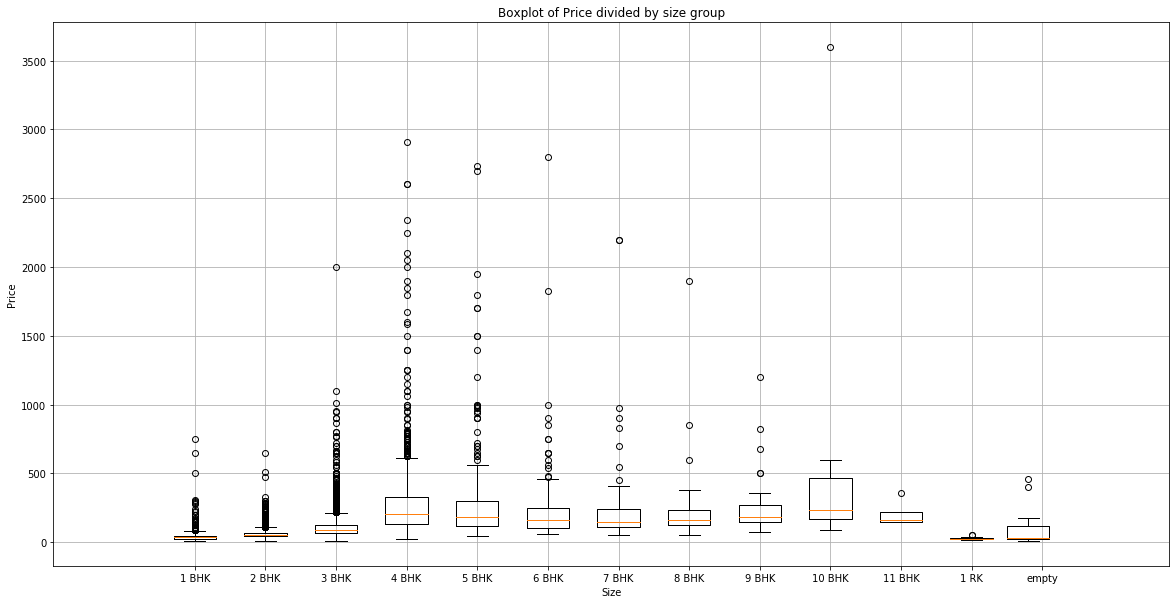

In [116]:
fig = plt.figure( figsize=(20,10))
ax = fig.add_subplot(111)

plt.grid(True)
#plt.yscale('log')
ax.boxplot(df[df['size']=="1 BHK"].price,positions =[0.25])
ax.boxplot(df[df['size']=="2 BHK"].price,positions =[0.5])
ax.boxplot(df[df['size']=="3 BHK"].price,positions =[0.75])
ax.boxplot(df[df['size']=="4 BHK"].price,positions =[1.0])
ax.boxplot(df[df['size']=="5 BHK"].price,positions =[1.25])
ax.boxplot(df[df['size']=="6 BHK"].price,positions =[1.50])
ax.boxplot(df[df['size']=="7 BHK"].price,positions =[1.75])
ax.boxplot(df[df['size']=="8 BHK"].price,positions =[2.00])
ax.boxplot(df[df['size']=="9 BHK"].price,positions =[2.25])
ax.boxplot(df[df['size']=="10 BHK"].price,positions =[2.50])
ax.boxplot(df[df['size']=="11 BHK"].price,positions =[2.75])
ax.boxplot(df[df['size']=="1 RK"].price,positions =[3.00])
ax.boxplot(df[df['size']=="empty"].price,positions =[3.20])

ax.set_xticklabels(['1 BHK','2 BHK','3 BHK','4 BHK','5 BHK','6 BHK','7 BHK','8 BHK',
                   '9 BHK','10 BHK','11 BHK','1 RK','empty'])
ax.set_xticks([0.25, 0.5, 0.75,1.00, 1.25, 1.5, 1.75,2.00, 2.25, 2.5, 2.75,3.00,3.25])


ax.set(title='Boxplot of Price divided by size group',
      ylabel='Price',
      xlabel='Size')

[Text(0, 0.5, 'total_sqft'),
 Text(0.5, 0, 'Size'),
 Text(0.5, 1.0, 'Boxplot of total_sqft divided by size group')]

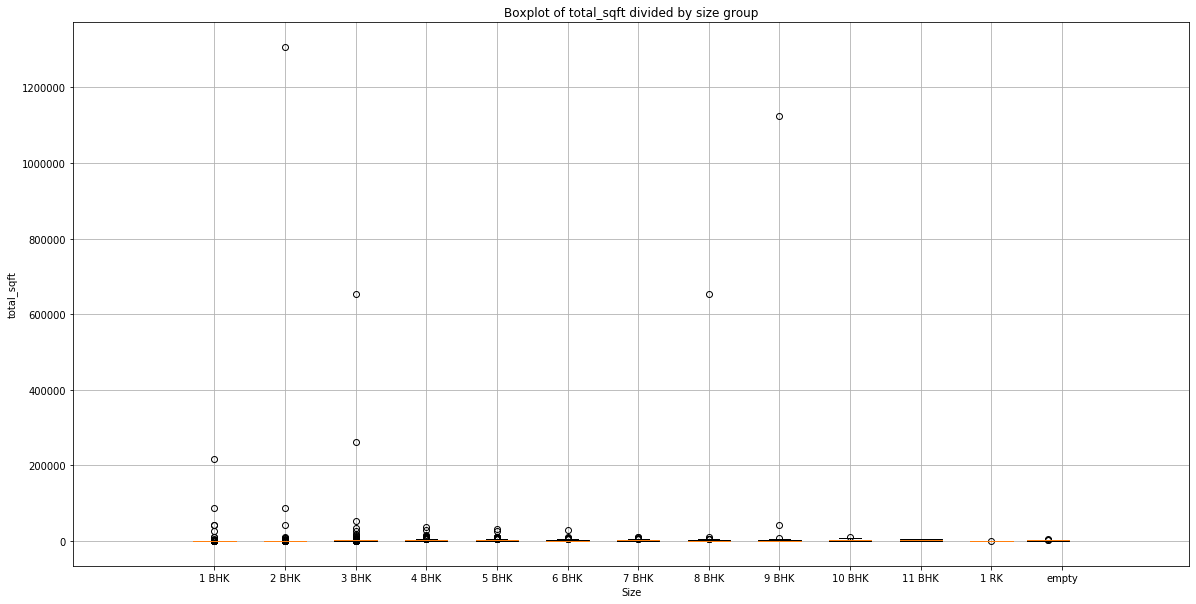

In [117]:
fig = plt.figure( figsize=(20,10))
ax = fig.add_subplot(111)

plt.grid(True)
#plt.yscale('log')
ax.boxplot(df[df['size']=="1 BHK"].total_sqft,positions =[0.25])
ax.boxplot(df[df['size']=="2 BHK"].total_sqft,positions =[0.5])
ax.boxplot(df[df['size']=="3 BHK"].total_sqft,positions =[0.75])
ax.boxplot(df[df['size']=="4 BHK"].total_sqft,positions =[1.0])
ax.boxplot(df[df['size']=="5 BHK"].total_sqft,positions =[1.25])
ax.boxplot(df[df['size']=="6 BHK"].total_sqft,positions =[1.50])
ax.boxplot(df[df['size']=="7 BHK"].total_sqft,positions =[1.75])
ax.boxplot(df[df['size']=="8 BHK"].total_sqft,positions =[2.00])
ax.boxplot(df[df['size']=="9 BHK"].total_sqft,positions =[2.25])
ax.boxplot(df[df['size']=="10 BHK"].total_sqft,positions =[2.50])
ax.boxplot(df[df['size']=="11 BHK"].total_sqft,positions =[2.75])
ax.boxplot(df[df['size']=="1 RK"].total_sqft,positions =[3.00])
ax.boxplot(df[df['size']=="empty"].total_sqft,positions =[3.20])

ax.set_xticklabels(['1 BHK','2 BHK','3 BHK','4 BHK','5 BHK','6 BHK','7 BHK','8 BHK',
                   '9 BHK','10 BHK','11 BHK','1 RK','empty'])
ax.set_xticks([0.25, 0.5, 0.75,1.00, 1.25, 1.5, 1.75,2.00, 2.25, 2.5, 2.75,3.00,3.25])


ax.set(title='Boxplot of total_sqft divided by size group',
      ylabel='total_sqft',
      xlabel='Size')

There are many gategories that are affecting the price.

In [118]:
size_list = df['size'].unique()

In [129]:
for j in size_list:
    m = 1000
    x = df[df['size']==j]
    x = x[x['total_sqft']>m]
    while len(x)>2:
        m = m+1000
        x = x[x['total_sqft']>m]
    if len(x)!=0:
        drop_df = x[x['total_sqft']>m]
        df = df.drop(drop_df.index)

In [131]:
len(df)

13269

In [121]:
x = df.sort_values(by=['bath'])

[Text(0, 0.5, 'Number of Bath'),
 Text(0.5, 0, 'Size'),
 Text(0.5, 1.0, 'Bar Char of # of Bath')]

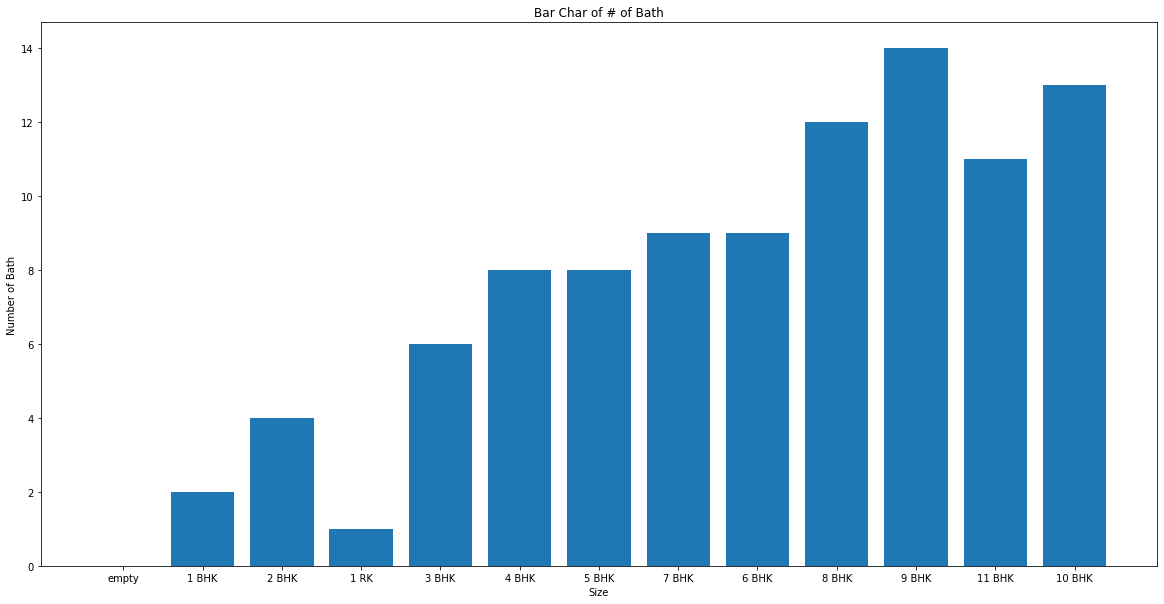

In [122]:
fig = plt.figure( figsize=(20,10))
ax = fig.add_subplot(111)
plt.bar(x['size'],x["bath"])
ax.set(title='Bar Char of # of Bath',
      ylabel='Number of Bath',
      xlabel='Size')


In [123]:
x = df.sort_values(by=['balcony'])

[Text(0, 0.5, 'Number of balcony'),
 Text(0.5, 0, 'Size'),
 Text(0.5, 1.0, 'Bar Char of # of balcony')]

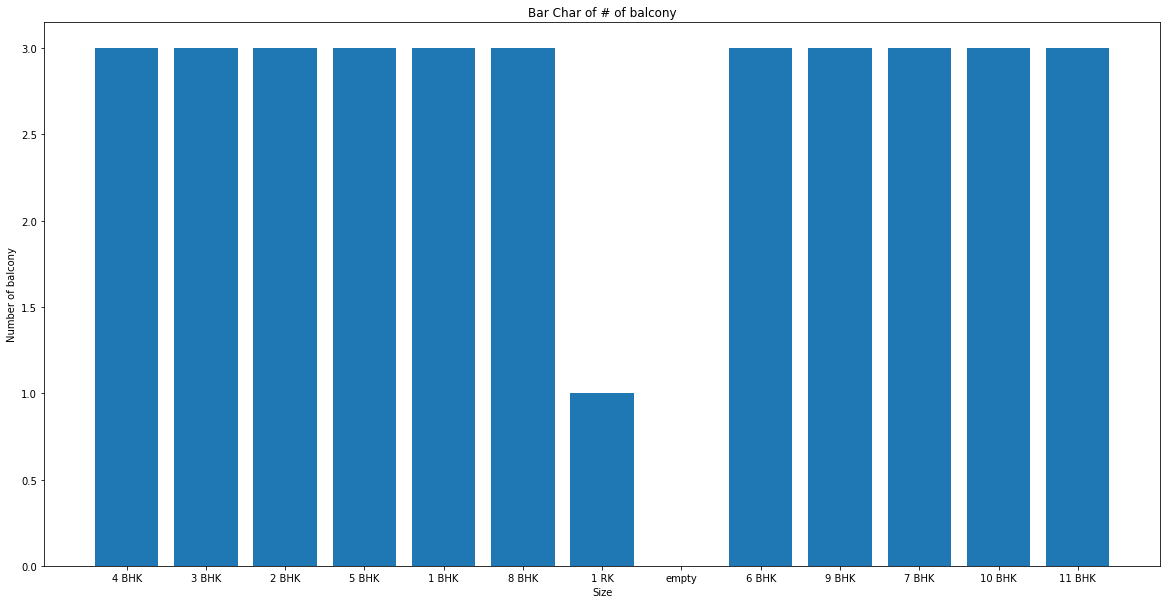

In [124]:
fig = plt.figure( figsize=(20,10))
ax = fig.add_subplot(111)
plt.bar(x['size'],x["balcony"])
ax.set(title='Bar Char of # of balcony',
      ylabel='Number of balcony',
      xlabel='Size')
